# PyTorch Modules

PyTorch modules (``nn.Module``) are objects representing neural networks, or pieces of neural networks.

When you write a PyTorch program, you will generally represent your full neural net with a module class. It will itself use *submodules* to represent basic neural network operations like linear transformations (`nn.Linear`) and embedding (`nn.Embedding`).

Here, we will go over ``nn.Embedding``, ``nn.Linear``, and activation function primitives, as well as a basic example putting them all together.

*Note: For complex architectures like recurrent neural nets and transformers, which are common in NLP, you may also use modules to use more complex pieces of the network.*


In [1]:
import torch
import torch.nn as nn

----------------------------------------------------
## Embedding Layers

As we saw earlier, text is often represented as a list of token indices for NLP models.

An embedding layer maps a tensor of token indices to a tensor of vector embeddings for those tokens. This adds one dimension to the tensor.

In [2]:
token_indices = torch.tensor([0, 1, 1])
embedder = nn.Embedding(num_embeddings=5, embedding_dim=5)
embedded = embedder(token_indices)
print("Token indices:", token_indices.shape)
print("Embeddings:", embedded.shape)

Token indices: torch.Size([3])
Embeddings: torch.Size([3, 5])


In [3]:
print(embedded)
# Tokens 1 and 2 are the same!
print((embedded[1] == embedded[2]).all().item())

tensor([[ 1.1524, -0.9389, -0.2373, -0.6686,  0.6030],
        [ 0.4801,  0.1361,  0.7921, -0.9245,  1.1372],
        [ 0.4801,  0.1361,  0.7921, -0.9245,  1.1372]],
       grad_fn=<EmbeddingBackward0>)
True


You can, and often do, call embedding layers in batched form:

In [4]:
token_indices = torch.tensor([
    [0, 1, 1],
    [1, 1, 0],
])
embeddings = embedder(token_indices)
print(token_indices.shape)
print(embeddings.shape)

torch.Size([2, 3])
torch.Size([2, 3, 5])


----------------------------------------------------
## Linear Layers

Linear transformations are a component component of neural networks. A linear transformation (technically affine transformation) is defined by a matrix $\mathbf W$ of size $m \times n$ and a bias vector $\mathbf b$ of size $n$.

Given an input $\mathbf x \in \mathbb{R}^n$, the linear transformation computes $\mathbf y \in \mathbb{R}^m$ according to

$$ \mathbf y = \mathbf W \cdot \mathbf x + \mathbf b $$

In PyTorch, you don't need to worry about creating matrices and vectors. all you do to create a linear transformation is call `nn.Linear(n_in, n_out)`, where `n_in` ($n$ above) is the dimension of the input vector, and `n_out` ($m$ above) is the dimension of the output vector.

In [5]:
x = torch.ones(5)
linear = nn.Linear(5, 10)
y = linear(x)
print(x.shape)
print(y.shape)

torch.Size([5])
torch.Size([10])


In [6]:
print(linear.weight.shape)
print(linear.bias.shape)

torch.Size([10, 5])
torch.Size([10])


----------------------------------------------------
## Activation Functions

Neural networks contain nonlinear "activation" functions between linear layers. These layers don't have parameters, so you can just compute them as functions:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

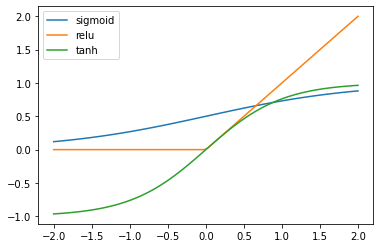

In [8]:
x = torch.tensor(np.linspace(-2, 2, 100))
y = torch.sigmoid(x)
plt.plot(x, torch.sigmoid(x), label="sigmoid")
plt.plot(x, torch.relu(x), label="relu")
plt.plot(x, torch.tanh(x), label="tanh")
plt.legend()
plt.show()

However, if you really need to (it is sometimes useful), you can also create modules that represent this functions. We can produce the plot above equivalently with:

In [9]:
sigmoid = nn.Sigmoid()
relu = nn.ReLU()
tanh = nn.Tanh()

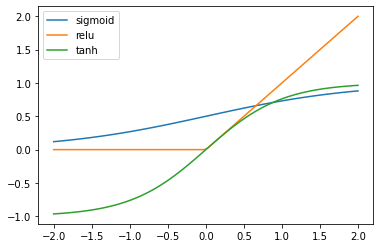

In [10]:
plt.plot(x, sigmoid(x), label="sigmoid")
plt.plot(x, relu(x), label="relu")
plt.plot(x, tanh(x), label="tanh")
plt.legend()
plt.show()

----------------------------------------------------
## Putting it All Together

Each neural net module needs to implement a `forward` function, which defines its forward computation (how it computes its output given its input).

**Exercise:** Implement a basic neural net that:
1. Takes as input two words (represented as token indices)
2. Computes their embeddings and sums them
3. Passes this vector through two hidden layers with ReLU activations.

You should use the modules we have learned about above.

In [14]:
class TextClassifier(nn.Module):
  def __init__(self, d_input: int, d_layer1: int, d_layer2: int, d_output):
    super().__init__()
    self.embedder = nn.Embedding(100, d_input)
    self.net = nn.Sequential(
        nn.Linear(d_input, d_layer1),
        nn.ReLU(),
        nn.Linear(d_layer1, d_layer2),
        nn.ReLU(),
        nn.Linear(d_layer2, d_output),
    )
    # self.linear1 = nn.Linear(d_input, d_layer1)
    # self.linear2 = nn.Linear(d_layer1, d_layer2)
    # self.classifier = nn.Linear(d_layer2, d_output)

  def forward(self, token1: torch.tensor, token2: torch.tensor) -> torch.tensor:
    embedding1 = self.embedder(token1)
    embedding2 = self.embedder(token2)
    sum_embedding = embedding1 + embedding2
    return self.net(sum_embedding)
    # layer1 = torch.relu(self.linear1(sum_embedding))
    # layer2 = torch.relu(self.linear2(layer1))
    # return self.classifier(layer2)

In [15]:
x1 = torch.tensor([1])
x2 = torch.tensor([2])

clf = TextClassifier(5, 10, 20, 3)
# clf.forward(x1, x2)

clf(x1, x2)


tensor([[-0.0967, -0.6162, -0.3922]], grad_fn=<AddmmBackward0>)

In [16]:
x1 = torch.tensor([1, 2, 3]) # [batch_size]
x2 = torch.tensor([2, 3, 4]) # [batch_size]

result = clf(x1, x2)
print(result.shape)

torch.Size([3, 3])
